# Word Embeddings

<p style="color: yellow">
It is highly recommended to use google colab for this notebook or else you need to download a dataset of size 386Mb and place it beside your local notebook. Also the last section benefits from GPU.</p>

Welcome to the second notebook of this assignment! Word embeddings are numerical representations of words. We can represent words as vectors and maintain their meaning. There are various ways of finding vecotrs for words, equivalently, word embeddings. We explore some of these techniques in this notebook.

In [ ]:
name = None
student_id = None

## Tabel of Contents

- 1- GloVe: Global Vectors for Word Representation
  - 1.1- Exploring word vectors (5 p)
  - 1.2- Visualizing in 2-D (10 p)
- 2- Evaluation
  - 2.1- Cosine similarity (5 p)
  - 2.2- A little test set (10 p)
- 3- Learn embeddings
  - 3.1- Dataset Preprocessing (10 p)
  - 3.1- Tokenization and Phrase Detection (5 p)
  - 3.3- Co-occurrence Matrix (15 p)
  - 3.4- SVD (5 p)
  - 3.5- Similarity (20 p)
- 4- Sentiment Analysis of MDB Movie Reviews
  - 4.1- Dataset (5 p)
  - 4.2- Model (10 p)
  - 4.3- Train (10 p)

## 1- GloVe: Global Vectors for Word Representation

GloVe (Global Vectors for Word Representation) is a pre-trained word embedding model developed by Stanford University. It is trained on large text corpora such as Wikipedia and Gigaword. The embeddings capture the semantic meaning of words, so words with similar meanings are represented by similar vectors in the embedding space.

The specific file `glove.6B.300d.txt` contains word vectors of size 300 (300-dimensional embeddings) trained on a dataset of 6 billion tokens from Wikipedia and Gigaword.

The vocabulary refers to the set of all words (or tokens) in the dataset for which embeddings are provided. Each word is represented as a dense vector of real numbers.

### 1.1- Exploring word vectors

According to the semantic meanings, what would be the values of $x, y, z, u, v$ and why?

|         | man   | woman | king  | queen | apple | orange |
| ---     | ---   | ---   |   --- | ---   | ---   |  ---   |
| gender  | -0.99 | 1     | -0.95 | 0.97  | u     | 0.01   |
| royalty | 0.01  | 0.02  | 0.93  | 0.95  | -0.01 | 0.00   |
| fruit   | 0.03  | x     | y     | z     | 0.94  | v      |

Note that we want the embeddings to capture semantic meanings such that $$man - woman \approx king - queen$$.

> YOUR ANSWER (0 or 1)

- x ≈
- y ≈
- z ≈
- v ≈
- u ≈

In [2]:
# run this code to install gensim on your environment
!pip install gensim

You can use the cell bellow to mount your drive with google colab. then after adding the dataset to your drive, you can access the dataset through colab. pay attention to unzip the dataset first.

link to dataset: https://drive.google.com/file/d/1amUx0ErSa3hsqiCdOQyDkO8uQBWz0uqD/view?usp=sharing

In [5]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [1]:
from gensim.models import KeyedVectors

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import numpy as np

In [11]:
# unzip the dataset. you may need to modify the relative address based on the location of dataset in your drive.
!unzip drive/MyDrive/Colab\ Notebooks/glove.6B.300d.txt.zip

Archive:  drive/MyDrive/Colab Notebooks/glove.6B.300d.txt.zip
  inflating: glove.6B.300d.txt       


In [12]:
model_path = "glove.6B.300d.txt"
print("Loading GloVe model from local file...")
model = KeyedVectors.load_word2vec_format(model_path, binary=False, no_header=True)
print("Model loaded!")

Loading GloVe model from local file...
Model loaded!


- **Vocabulary Size:** The size of the vocabulary is the number of unique words in the dataset.
- **Embedding Dimension:** This represents the length of the vector used to encode each word. For `glove.6B.300d.txt`, the dimension is 300.

Here are the key attributes of the loaded model.

- `index_to_key`
  - **Description:** A list of all the words (tokens) in the vocabulary in the order they were loaded.
  - **Example Usage:** To access the 10th word in the vocabulary:
      ```python
    model.index_to_key[9]

- `key_to_index`
  - **Description**: A dictionary mapping each word (token) to its corresponding index in the vocabulary.
  - **Example Usage**: To get the index of the word "king":
      ```python
      model.key_to_index["king"]
- `vectors`
  - **Description**: A NumPy array of shape (vocab_size, embedding_dim) where each row corresponds to the embedding of a word in the vocabulary.
  - **Example Usage**: To access the vector for the word "queen":
      ```python
      model["queen"]

- `get_vector(word)`
  - **Description**: A method to retrieve the embedding vector for a specific word.
  - **Example Usage:**
      ```python
      embedding_vector = model.get_vector("apple")

In [ ]:
def print_model_attributes(model):
    # TODO: extract and pring the vocabulary size.

    # TODO: extract and pring the embedding dimension.

    return vocab_size, embedding_dim

vocab_size, embedding_dim = print_model_attributes(model)
print(f"Vocab size: {vocab_size}")
print(f"Embedding dimension: {embedding_dim}")

### 1.2- Visualizing in 2-D

Use PCA and t-SNE for dimensionality reduction in [sklearn](https://scikit-learn.org/1.5/modules/generated/sklearn.manifold.TSNE.html) for visualizing the embeddings for relationships like:

- tall $\rightarrow$ taller $\rightarrow$ tallest
- big $\rightarrow$ bigger $\rightarrow$ biggest

In [14]:
def plot_embeddings_2d(model, words, method="PCA", perplexity=None, line_plot=None):
    # TODO: reduce the dimensionality of the embeddings to 2D using PCA or t-SNE. (≈6 lines)
    reduced_embeddings = None

    # plot
    plt.figure(figsize=(5, 5))
    for i, word in enumerate(words):
        x, y = reduced_embeddings[i]
        plt.scatter(x, y)
        plt.text(x + 0.01, y + 0.01, word, fontsize=12)

    if line_plot:
        for (i, j) in line_plot:
            x1, y1 = reduced_embeddings[i]
            x2, y2 = reduced_embeddings[j]
            plt.plot([x1, x2], [y1, y2], color='red', linestyle='--')

    plt.title(f"Word Embeddings Visualization ({method})")
    plt.show()

In [15]:
words = ["tall", "taller", "tallest", "big", "bigger", "biggest", "wide", "wider", "widest"]
line_plot = [(0, 1), (1, 2), (3, 4), (4, 5), (6, 7), (7, 8)]
words1 = ["smart", "smarter", "smartest", "wide", "wider", "widest", "small", "smaller", "smallest"]
line_plot1 = [(0, 1), (1, 2), (3, 4), (4, 5), (6, 7), (7, 8)]
words2 = ["man", "woman", "king", "queen", "boy", "girl", "husband", "wife"]
line_plot2 = [(0, 1), (2, 3), (4, 5), (6, 7)]

In [ ]:
plot_embeddings_2d(model, words, method="PCA", line_plot = line_plot)
plot_embeddings_2d(model, words, method="tSNE", perplexity = 3, line_plot = line_plot)

In [ ]:
plot_embeddings_2d(model, words1, method="PCA", line_plot = line_plot1)
plot_embeddings_2d(model, words1, method="tSNE", perplexity = 3, line_plot = line_plot1)

In [ ]:
plot_embeddings_2d(model, words2, method="PCA", line_plot = line_plot2)
plot_embeddings_2d(model, words2, method="tSNE", perplexity = 3, line_plot = line_plot2)

## 2- Evaluation

### 2.1- Cosine similarity

To evaluate the quality of word vectors, we should look at the similarity of word vectors that are semantically similar, for example word *France* is similar to *Italy*, so their word vectors should be similar. One common metric to measure the distance between word vectors is the **cosine similarity**. The cosine similarity between two words $w_x$ and $w_y$ is defined as
$$
cos(w_x, w_y) = \frac{w_x^Tw_y}{||w_x|| ||w_y||}
$$
, where $||.||$ is the $l_2$ norm.

In [ ]:
def cosine_similarity(u, v):
    # TODO: compute the cosine similarity between vectors u and v. (≈1 line)
    pass

def find_most_similar(word, model, top_n=5):
    # TODO: find the top_n most similar words to the given word. (≈4 lines)
    pass

# TODO: find the cosine similarity between the vectors of "france" and "tehran". (≈1 line)

# TODO: same as above for "france" and "paris". (≈1 line)

# TODO: find the top 5 most similar words to "france". (≈1 line)


### 2.2- A little test set

One evaluation approach that was introduced in [Efficient Estimation of Word Representations in Vector Space](https://arxiv.org/pdf/1301.3781) is to consider two pairs of words that have the same type of relationship, for example, *big - bigger* and *small - smaller*. Each two pairs can be viewed as a question: ”What is the word that is similar to small in the same sense as bigger is similar to big?”.

Interestingly, these questions can be answered by doing basic algebraic operations on the word vectors. First we compute $$x = w_{bigger}-w_{big}+w_{small}$$, and then search through all possible word vectors to find the closest one to $x$. In this notebook we use cosine similarity to measure closeness. So the problem can be written as $$ w^{*} = \arg\max_{w} cos(w, w_{bigger}-w_{big}+w_{small}) $$.

In [ ]:
test_set = [
    ["paris", "france", "toronto", "canada"],
    ["australia", "dollar", "japan", "yen"],
    ["chicago", "illinois", "stockton", "california"],
    ["brother", "sister", "father", "mother"],
    ["apparent", "apparently", "rapid", "rapidly"],
    ["possibly", "impossibly", "ethical", "ethically"],
    ["great", "greater", "tough", "tougher"],
    ["easy", "easiest", "lucky", "luckiest"],
    ["think", "thinking", "read", "reading"],
    ["switzerland", "swiss", "turkey", "turkish"],
    ["walking", "walked", "swimming", "swam"],
    ["mouse", "mice", "dollar", "dollars"],
    ["work", "works", "speak", "speaks"],
]

def analogy(model, words):
    a, b, c, d = words
    # TODO: find the word that completes the analogy. (≈10 lines)

    return best_word, best_score

def evaluate_analogy(model, test_set):
    # TODO: evaluate the model on the analogy task. (≈4 lines)
    correct = 0

    return correct / len(test_set)

accuracy = evaluate_analogy(model, test_set)
print(f"Accuracy: {accuracy}")

## 3- Learn embeddings

This part goes through the process of cleaning a dataset, visualizing tokens, creating word embeddings using a co-occurrence matrix, and applying Singular Value Decomposition (SVD) to reduce dimensionality.

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

import pandas as pd
import numpy as np
import re
from collections import defaultdict
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse.linalg import svds

from gensim.models.phrases import Phrases, Phraser
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from plotly.offline import init_notebook_mode

init_notebook_mode(connected=True)

### 3.1- Dataset Preprocessing

In this section, we will:

1. Load the Simpsons dataset.
2. Clean the text data by removing stop words, lemmatizing words, and filtering tokens.
3. Visualize the top tokens using a WordCloud.

In [ ]:
root_path = '.' # Change this to the root path of your dataset
df = pd.read_csv(f'{root_path}/simpsons_dataset.csv')
print(f"Initial Dataset Shape: {df.shape}")
df

Initial Dataset Shape: (158314, 2)


,raw_character_text,spoken_words
0,Miss Hoover,"No, actually, it was a little of both. Sometim..."
1,Lisa Simpson,Where's Mr. Bergstrom?
2,Miss Hoover,I don't know. Although I'd sure like to talk t...
3,Lisa Simpson,That life is worth living.
4,Edna Krabappel-Flanders,The polls will be open from now until the end ...
...,...,...
158309,Miss Hoover,I'm back.
158310,Miss Hoover,"You see, class, my Lyme disease turned out to ..."
158311,Miss Hoover,Psy-cho-so-ma-tic.
158312,Ralph Wiggum,Does that mean you were crazy?


In [ ]:
df.isnull().sum()

,0
raw_character_text,17814
spoken_words,26459


In [ ]:
# TODO: drop the rows with missing values. (≈1 line)

print(f"Dataset Shape after Dropping NaNs: {df.shape}")

Dataset Shape after Dropping NaNs: (131853, 2)


**Removing Stop Words in NLP Using NLTK:** Stop words are common words like "and," "the," or "is" that add little value to text analysis. In NLP, we use tools like NLTK to remove these words and focus on meaningful terms for better accuracy in tasks like sentiment analysis and classification.

For example consider this text:

*The quick brown fox jumps over the lazy dog.*

After removing stop words `["the", "over"]`, we get:

*quick brown fox jumps lazy dog.*

By eliminating stop words, the processed text becomes more concise and meaningful for analysis.

In the cell below, download the NLTK stopwords and WordNet modules. You can also add custom stopwords.

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
stop_words = set(stopwords.words('english'))

# Add custom stop words
stop_words.update([
    "i'm", "i'll", "this'll", "what'l", "that's", "he", "he'd", "she", "she'd",
    "it", "they", "him", "her", "his", "their", "but", "for", "nor", "so",
    "with", "by", "be", "have", "do", "can", "will", "may", "very", "really",
    "just", "then", "now", "there", "where", "how", "like", "uh", "um",
    "you know", "oh", "well",
    "that", "these", "those", "each", "every", "some", "any", "all",
    "one", "two", "three", "four", "five", "six", "seven", "eight",
    "nine", "ten", "much", "many", "more", "most", "less", "least",
    "same", "other", "another", "which", "whoever", "whomever",
    "whichever", "whatsoever", "could", "would", "should", "might",
    "must", "shall", "can", "may", "if", "as", "than", "while",
    "because", "although", "since", "unless", "whereas", "before",
    "after", "during", "while", "about", "along", "among", "but",
    "yet", "for", "nor", "so", "either", "neither", "whether",
    "instead", "regarding", "despite", "although", "not", "never",
    "ever", "just", "really", "very", "quite", "too", "still",
    "yet", "also", "especially", "particularly", "simply",
    "actually", "literally", "essentially", "virtually", "truly",
    "specially", "in fact", "on the other hand", "in addition",
    "meanwhile", "however", "therefore", "furthermore", "likewise",
    "consequently", "subsequently", "additionally", "moreover",
    "notably", "here", "there", "when", "where", "what", "why","aw","oooh",
    "who", "whom", "whose", "which", "how", "a", "an", "the","who's",
])

print(stop_words)

{'and', 'therefore', 'might', 'were', 'why', 'whose', 'doing', 'or', 'above', 'i', 'him', 'some', "should've", 'still', "that'll", 'all', 'yet', 'simply', 'again', 'despite', 'through', 'whom', "you'd", "won't", 'be', 'down', "i'll", 'least', 'll', 'whether', 'so', 'before', 'no', "who's", 'she', 'it', 'most', 'uh', 'two', 'virtually', 'essentially', 'since', 'ours', 'really', 'theirs', 'in addition', 'not', 'whatsoever', 'few', 'which', "shan't", 'had', 'myself', 'with', 'who', 'into', 'shan', 'couldn', 'literally', 'herself', 'only', 'from', 'y', 'mightn', 'oh', 'been', 'five', 'along', 'nine', 'have', 'shall', 'subsequently', 'could', 'ourselves', 'mustn', 'you', 'one', 'to', 'too', 'me', 'when', 'wouldn', 'of', 'ain', 'eight', 'consequently', 'you know', 'does', 'under', 'same', 'will', 'this', 'won', 'after', 'meanwhile', "shouldn't", 'themselves', 'such', "weren't", 'each', 'more', 'haven', 'was', 'likewise', 'yours', "aren't", 'what', 'they', 'against', 'my', 'ma', 'especially',

The `WordNetLemmatizer` is a tool provided by NLTK that reduces words to their base or root form, known as the **lemma**, while ensuring the word remains meaningful in context. **Lemmatization** uses linguistic rules and a vocabulary (WordNet) to produce valid dictionary words.
For example:
- `"running"` becomes `"run"`  
- `"better"` becomes `"good"`  

The `clean_text` function preprocesses input text to prepare it for NLP tasks by performing the following steps:

1. **Remove Non-Alphabetic Characters**:  
   Removes characters that aren't letters to clean the text like punctuation and numbers.

2. **Lowercase Conversion**:
   Converts all letters to lowercase for uniformity.

3. **Tokenization and Stop Word Removal**:  
   Breaks the text into individual words (in this case **tokens**) and removes common stop words to focus on meaningful terms.  

4. **Lemmatization**:  
   Converts each word to its root form using the `WordNetLemmatizer` for better consistency in analysis.  

After this preprocesses we have:

- Input: `"The running dogs quickly jumped over fences!"`  
- Output: `"run dog quick jump fence"`  

The function ensures the text is simplified and meaningful, helping improve the performance of NLP tasks such as text classification or sentiment analysis. If the cleaned text has fewer than three words, it skips the text.

In [ ]:
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    """Cleans input text by removing non-alphabetic characters,
     lowercasing, removing stopwords, and lemmatizing."""

    # TODO: Remove non-alphabetic characters and convert to lowercase (≈1 line)


    # TODO: Tokenize and remove stop words, apply lemmatization (≈2 lines)

    # Return cleaned text if it has more than 2 tokens (≈2 lines)
    pass

In [ ]:
# TODO: Apply cleaning and save the result in another columns spoken_words_clean (≈1 line)


After cleaning some values might become NaN, remove them. Then Display cleaned dataframe.

In [ ]:
# TODO: Drop NaN values and duplicates after cleaning (≈1 line)

df_clean = df_clean.rename(columns={'spoken_words_clean': 'clean'})

print(f"Cleaned Dataset Shape: {df_clean.shape}")
df_clean

Cleaned Dataset Shape: (90513, 2)


,spoken_words,clean
0,"No, actually, it was a little of both. Sometim...",little sometimes disease magazine news show na...
1,Where's Mr. Bergstrom?,where's mr bergstrom
2,I don't know. Although I'd sure like to talk t...,know i'd sure talk touch lesson plan teach
3,That life is worth living.,life worth living
4,The polls will be open from now until the end ...,poll open end recess case decided put thought ...
...,...,...
131835,Can I dye my shoes pink?,dye shoe pink
131846,"Mr. Bergstrom, we request the pleasure of your...",mr bergstrom request pleasure company mr bergs...
131847,"Good morning, Lisa.",good morning lisa
131849,"You see, class, my Lyme disease turned out to ...",see class lyme disease turned


In [ ]:
sample_examples = df_clean.sample(5, random_state=8)

print("=== Sample Cleaning Examples ===\n")

for index, row in sample_examples.iterrows():
    print(f"Example {index + 1}:")
    print(f"------------------")
    print(f"Original: {row['spoken_words']}")
    print(f"Cleaned:  {row['clean']}")
    print(f"------------------\n")

print("===============================")

=== Sample Cleaning Examples ===

Example 80638:
------------------
Original: I was doing uh, Donald Trump. Billionaire. If you knew who he was, you'd be dying.
Cleaned:  donald trump billionaire knew dying
------------------

Example 11107:
------------------
Original: Gee, it's not as nice as the other rooms.
Cleaned:  gee nice room
------------------

Example 105614:
------------------
Original: ...for creating a furry robotic friend who provides comfort when humans fail to, which they will, trust me.
Cleaned:  creating furry robotic friend provides comfort human fail trust
------------------

Example 61632:
------------------
Original: All right, we will write a list.
Cleaned:  right write list
------------------

Example 113245:
------------------
Original: We have a school full of professionals, sir.
Cleaned:  school full professional sir
------------------



To continue, let's only keep the preprocessed texts.

In [ ]:
df_clean = df_clean.drop(columns=['spoken_words'])
df_clean

,clean
0,little sometimes disease magazine news show na...
1,where's mr bergstrom
2,know i'd sure talk touch lesson plan teach
3,life worth living
4,poll open end recess case decided put thought ...
...,...
131835,dye shoe pink
131846,mr bergstrom request pleasure company mr bergs...
131847,good morning lisa
131849,see class lyme disease turned


The **`WordCloud`** library in Python is used to create visual representations of text data, where word size reflects its frequency or importance. It offers customizable options like background color, dimensions, and stop word filtering, making it a powerful tool for quickly analyzing text patterns.

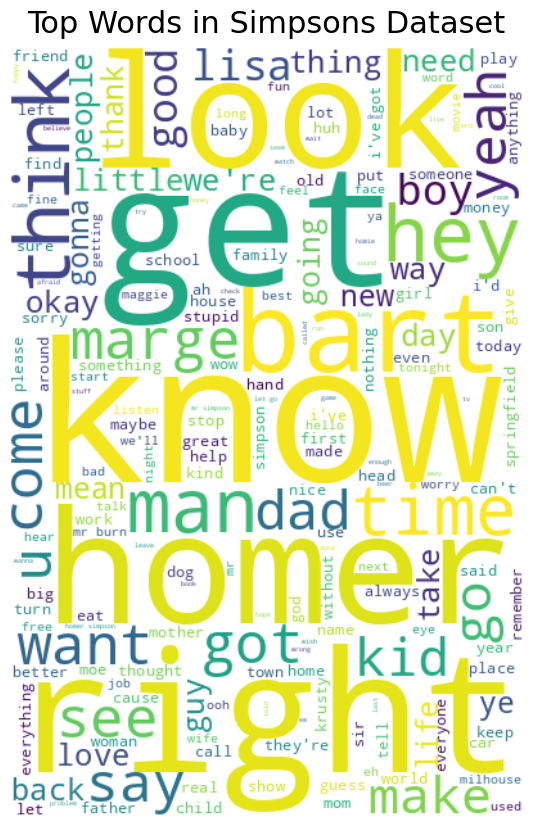

In [ ]:
# TODO: Combine all cleaned texts into a single string (≈1 line)

wc = WordCloud(
    background_color='white',
    stopwords=stop_words,
    max_words=200,
    height=600,
    width=400,
).generate(text)

plt.figure(figsize=(18, 10))
plt.title('Top Words in Simpsons Dataset', fontdict={'size': 22, 'verticalalignment': 'bottom'})
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

### 3.2- Tokenization and Phrase Detection

In this section, we will tokenize cleaned sentences and use the Gensim Phrases and Phraser tools to detect common bigrams in the text.

Tokenization is the process of splitting text into individual words or tokens. In this case, we will split each sentence in `df_clean['clean']` into a list of words, preparing the text for further analysis, such as phrase detection.

**Original Sentence:**  
```python
The quick brown fox jumps over the lazy dog.
```

**Tokenized Output:**  
```python
['The', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog']
```

This step transforms the text into a format that is easier to work with in subsequent analyses.

In [ ]:
# TODO: Tokenize sentences (≈1 line)

sentences[:2]

[['little',
  'sometimes',
  'disease',
  'magazine',
  'news',
  'show',
  'natural',
  'think'],
 ["where's", 'mr', 'bergstrom']]

In this part, we perform two key tasks: detecting common **bigrams** (pairs of words) in the text and calculating the **frequency** of each word, including bigrams, in the dataset.

The `Phrases` tool from Gensim is used to detect common bigrams in the tokenized sentences. The `min_count ` argument ensures that only bigrams appearing at least five times are considered, and `threshold ` filters out less significant bigrams. The `Phraser` tool speeds up the transformation by creating a more efficient bigram model.

The model is applied to the tokenized sentences, enriching the text with detected bigrams.

If the input text contains the sentences:  
- "The quick brown fox"
- "The quick fox jumps"

After bigram detection, common bigrams like `("quick", "fox")` might be added.

In [ ]:
# TODO: Detect bigrams & Transform sentences to include detected bigrams (≈3 lines)


Use `defaultdict` to count how often each word (including bigrams) appears across all sentences. then print total number of unique words.

In [ ]:
# TODO: Calculate word frequencies (≈4 lines)

print(f"Total unique words: {len(word_freq)}")

### 3.3- Co-occurrence Matrix

In this section, we will build a co-occurrence matrix to analyze how often two words appear together within a specific context window.

The **context window** defines how many words before and after a given word will be considered as its context. For example, a context window size of 2 means each word is compared with the two words before and after it.

A threshold for word frequency (`min_freq = 10`) ensures that only words appearing at least 10 times in the text are included in the vocabulary. This reduces noise from infrequent words.

The **co-occurrence matrix** is a square matrix where both rows and columns represent the words in the filtered vocabulary. If the vocabulary size is $N$, which is the number of unique words, the matrix will have a shape of $(N \times N)$. Each entry $[i, j]$ in the matrix shows the count of how often word $i$ appears with word $j$ within the context window.

For each sentence, we iterate through its words. For each word, its context (words within the context window) is identified, and the corresponding matrix entries are incremented. A larger context window increases the number of words included as context for each word, leading to more entries being updated in the matrix. Conversely, a smaller window focuses on closer relationships, resulting in sparser updates.

Let's see an example. Consider the following sentence with context window of $2$
```python
"The quick brown fox jumps."
```

For the word `"quick"`, its context words are `"the"`, `"brown"`, and `"fox"`. The co-occurrence matrix will be updated at positions corresponding to these pairs:  
```python
('quick', 'the'), ('quick', 'brown'), ('quick', 'fox')
```

This is repeated for each word in the sentence.

In [ ]:
CONTEXT_WINDOW = 2
min_freq = 10

# TODO: Update the vocabulary co-occurrence matrix (≈13 lines)

print(f"Co-occurrence Matrix Shape: {co_occurrence_matrix.shape}")

### 3.4- SVD

In this section, students will apply Singular Value Decomposition (SVD) to reduce the dimensionality of the co-occurrence matrix and visualize word embeddings in a 2D and 3D space.

After performing SVD on the co-occurrence matrix, it is factorized into three matrices:
- $U$: Represents the left singular vectors, capturing word relationships.
- $\Sigma$: A diagonal matrix of singular values, representing the importance of each dimension.
- $V^T$: Represents the right singular vectors, capturing document or context relationships.

We use the $U$ matrix as the **new word embeddings** because it captures word-to-word relationships in a reduced-dimensional space. By truncating $U$ to the top $k$ dimensions (corresponding to the largest singular values in $\Sigma$), we retain the most important features while discarding noise and less informative components.

In [ ]:
n_components = 64
# TODO: Perform SVD using scipy.sparse.linalg.svds it's more efficient (≈1 line)

reduced_embeddings = u

In [ ]:
def visualize_embeddings(embeddings, vocab, dim=2, num_words=100):
    """
    Visualizes word embeddings in 2D or 3D.

    Args:
    - embeddings: Reduced embeddings (numpy array).
    - vocab: List of words corresponding to embeddings.
    - dim: Dimension of visualization (2 or 3).
    - num_words: Number of words to visualize.
    """
    if dim not in [2, 3]:
        raise ValueError("Visualization dimension must be 2 or 3.")

    # TODO: Randomly select a subset of words and their embeddings (≈3 lines)

    if dim == 2:
        df = pd.DataFrame({
            'word': subset_vocab,
            'x': subset_embeddings[:, 0],
            'y': subset_embeddings[:, 1]
        })

        # Plot 2D visualization
        plt.figure(figsize=(12, 8))
        plt.scatter(df['x'], df['y'], alpha=0.7, edgecolors='k')
        for i, word in enumerate(df['word']):
            plt.text(df['x'][i], df['y'][i], word, fontsize=9)
        plt.title('2D Visualization of Word Embeddings')
        plt.xlabel('Component 1')
        plt.ylabel('Component 2')
        plt.show()

    elif dim == 3:
        fig = plt.figure(figsize=(12, 8))
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(subset_embeddings[:, 0], subset_embeddings[:, 1], subset_embeddings[:, 2], alpha=0.7, edgecolors='k')
        for i, word in enumerate(subset_vocab):
            ax.text(subset_embeddings[i, 0], subset_embeddings[i, 1], subset_embeddings[i, 2], word, fontsize=9)
        ax.set_title('3D Visualization of Word Embeddings')
        ax.set_xlabel('Component 1')
        ax.set_ylabel('Component 2')
        ax.set_zlabel('Component 3')
        plt.show()

visualize_embeddings(reduced_embeddings, vocab, dim=2, num_words=15)

In [ ]:
visualize_embeddings(reduced_embeddings, vocab, dim=3, num_words=10)

### 3.5- Similarity

In this part, we will compute cosine similarity between word embeddings to find words that are semantically similar or dissimilar. Cosine similarity is a measure of similarity between two vectors, calculated by measuring the cosine of the angle between them. A cosine similarity close to 1 indicates high similarity, while a value close to -1 indicates dissimilarity.

1. **get_similar_words**:  
   This function computes the similarity between a given word and all other words in the vocabulary. It returns the top N words most similar to the given word, based on cosine similarity.

2. **get_dissimilar_words**:  
   This function works similarly to `get_similar_words` but returns words that are the most dissimilar to the input word. It finds the top N words that have the lowest cosine similarity to the input word.

3. **get_closest_words_to_vector**:  
   This function finds the closest words to a random vector in the embedding space. It calculates the cosine similarity between the random vector and all word embeddings and returns the top N closest words.

4. **find_analogy**:  
   This function solves word analogies like "king - man + woman = ?" by subtracting the vector of word B from word A and adding the vector of word C. The resulting vector represents the analogy, and the function returns the words closest to this analogy vector.

5. **get_neighbors_of_group**:  
   This function calculates the collective nearest neighbors for a group of words. It averages the word vectors of the given group of words and finds the most similar words to this average vector.

In [ ]:
# Define a function to calculate cosine similarity
def get_similar_words(word, top_n=5, embedding_dim=10):
    """
    Finds similar words based on cosine similarity.

    Args:
    - word: The word to find similarities for.
    - top_n: Number of similar words to return.
    - embedding_dim: Dimensionality of embeddings to use.

    Returns:
    - List of tuples with similar words and their similarity scores.
    """
    # TODO: Use the selected dimensions for similarity calculation (≈5 lines)
    pass

In [ ]:
# Display some similar words to main characters of simpsons (homer , lisa , bart , ...)
# For example we know homer is lazy and hopeless can embeddings caputure this ?
# Adjust your embedding_dim
word = 'homer'

In [ ]:
# Checkout lisa
word = 'lisa'

In [ ]:
# What about bart
word = 'bart'

In [ ]:
def get_dissimilar_words(word, top_n=5, embedding_dim=10):
    """
    Finds dissimilar words based on cosine similarity.

    Args:
    - word: The word to find dissimilarities for.
    - top_n: Number of dissimilar words to return.
    - embedding_dim: Dimensionality of embeddings to use.

    Returns:
    - List of tuples with dissimilar words and their similarity scores.
    """
    # TODO: Use the selected dimensions for similarity calculation (≈5 lines)
    pass

# TODO: Find dissimilar words to 'homer' (≈2 line)

Words dissimilar to 'homer': [('severe', -0.9972801), ('cured', -0.9936608), ('state_capital', -0.9936375), ("o'clock", -0.9923287), ('becomes', -0.9895474)]


In [ ]:
def get_closest_words_to_vector(vector, top_n=5, embedding_dim=10):
    """
    Finds words closest to a given vector in embedding space.

    Args:
    - vector: A vector (numpy array) to compare against embeddings.
    - top_n: Number of closest words to return.
    - embedding_dim: Dimensionality of embeddings to use.

    Returns:
    - List of tuples with closest words and their similarity scores.
    """
    # TODO: find the closest words to the given vector (≈5 lines)
    pass

# TODO: Find closest words to a random vector (≈3 lines)
# are the closest word to random vector similar to each other ?


Words closest to the random vector: [('wealth', 0.8986273259615769), ('opinion', 0.8345061125823161), ('laser', 0.8325551371329472), ('hire', 0.8026285758002211), ('stanley', 0.7995809838037649)]


In [ ]:
def find_analogy(word_a, word_b, word_c, top_n=1, embedding_dim=10):
    """
    Solves word analogy: word_a - word_b + word_c = ?

    Args:
    - word_a, word_b, word_c: Words for the analogy equation.
    - top_n: Number of closest words to return.
    - embedding_dim: Dimensionality of embeddings to use.

    Returns:
    - List of tuples with the closest words and their similarity scores.
    """
    # TODO: Implement the analogy equation (≈8 lines)
    pass

# Let's evaluate if the word embeddings can identify relationships and analogies between words.
analogy_result = find_analogy('bart', 'man', 'woman', top_n=6, embedding_dim=10)
print("Result of analogy 'bart - man + woman':", analogy_result)

Result of analogy 'bart - man + woman': [("i've_waiting", 0.91323423), ('banned', 0.8903804), ('mystery', 0.8787862), ('long', 0.8766972), ('break', 0.87667096), ('detroit', 0.86488664)]


In [ ]:
def get_neighbors_of_group(words, top_n=5, embedding_dim=10):
    """
    Finds nearest neighbors for a group of words.

    Args:
    - words: List of words to find collective neighbors for.
    - top_n: Number of neighbors to return.
    - embedding_dim: Dimensionality of embeddings to use.

    Returns:
    - List of tuples with the closest words and their similarity scores.
    """
    # TODO: find the neighbors of the group of words (≈6 lines)
    pass

# TODO: Find neighbors of the group ['homer', 'bart'] (≈1 line)

print("Neighbors of the group ['homer', 'bart']:", group_neighbors)

Neighbors of the group ['homer', 'bart']: [('experiment', 0.9549409), ('buster', 0.94156414), ('grandfather', 0.9339998), ('address', 0.92143565), ('post_office', 0.9203641)]


## 4- Sentiment Analysis of MDB Movie Reviews

In this section, we want to assign a positive/negative lable to a user review for a movie. We will use LSTM, a version of RNN, to process the embeddings. We use the previous embeddings for this section. Let's dive in!

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split

import re
from tqdm import tqdm

### 4.1- Dataset

Here we load the dataset. the dataset consists of $5000$ reviews (the original dataset has $50000$ rows, for time constraints, we just use the first $5000$ rows of reviews) with their sentiment ,positive or negative.

In [ ]:
df = pd.read_csv('IMDB Dataset_small.csv')
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
4995,An interesting slasher film with multiple susp...,negative
4996,i watched this series when it first came out i...,positive
4997,Once again Jet Li brings his charismatic prese...,positive
4998,"I rented this movie, after hearing Chris Gore ...",negative


First, let's remove unnecessary words from each review. And also map the sentiment to numerical binary values.

In [ ]:
def preprocess_string(s):
    # Remove all non-word characters (everything except numbers and letters)

    # Replace all runs of whitespaces with no space

    # replace digits with no space

    return s

# TODO: Apply the preprocessing function to the 'review' column (≈1 line)

# TODO: make the 'sentiment' column numerical (≈1 line)

df

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production br br The filmin...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically theres a family where a little boy J...,0
4,Petter Matteis Love in the Time of Money is a ...,1
...,...,...
4995,An interesting slasher film with multiple susp...,0
4996,i watched this series when it first came out i...,1
4997,Once again Jet Li brings his charismatic prese...,1
4998,I rented this movie after hearing Chris Gore s...,0


Plot the histogram of reviews lengths.

<Axes: >

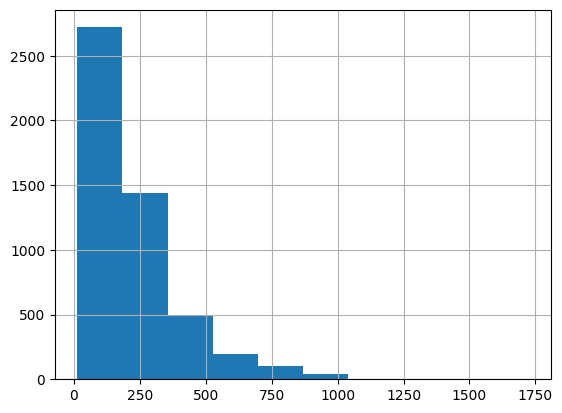

In [ ]:
# TODO: Plot the histogram of review lengths (number of words) (≈2 line)


Write the tokenize function to tokenize each word. You can use your previous vocabulary. This cell will take about $2$ minutes.

In [ ]:
def _tokenize(s):
    # TODO: Use the previous dictionary to tokenize the input string (≈1 line)
    pass

# TODO: Tokenize the reviews (≈1 line)

X

,review
0,"[4971, 962, 4684, 3053, 65, 2364, 487, 146, 22..."
1,"[340, 0, 1422, 5330, 1, 285, 1996, 894, 1164, ..."
2,"[28, 340, 74, 990, 198, 767, 4267, 424, 3443, ..."
3,"[1167, 0, 537, 2642, 3277, 352, 1717, 2881, 51..."
4,"[2281, 1388, 5133, 4954, 1149, 1717, 304, 507,..."
...,...
4995,"[1647, 2281, 5753, 66, 2364, 6062, 2118, 338, ..."
4996,"[3390, 4926, 228, 703, 3725, 1484, 452, 3390, ..."
4997,"[561, 2100, 1717, 2550, 2281, 2281, 2430, 2872..."
4998,"[4742, 1717, 1451, 162, 763, 2418, 5, 792, 528..."


Pad the sentences to a fixed size $512$. If they are longer, truncate them.

In [ ]:
def padding_(sentences, seq_len):
    # TODO: Implement the padding function (≈5 lines)
    pass

X = padding_(X.values, 512)

In [ ]:
# TODO: Define the labels y (≈1 line)

assert X.shape == (5000, 512) and y.shape == (5000,)

Use `reduced_embeddings` from the previous section to make the input in shape $N \times L \times D$, where $N=5000$ is the number of the rows, $L=512$ is the sequence length for each review, and $D=64$ is the dimension of embeddings after SVD.

In [ ]:
# TODO: Use the previous embeddings to create the embedding matrix (≈1 line)

print(f'Shape of X: {X.shape}')

Shape of X: (5000, 512, 64)


In this part split the dataset into train and validation sets. Use [DataLoader](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html) to create batches of the input data.

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Train size: {len(X_train)} | Validation size: {len(X_val)}")

In [ ]:
# TODO: Create Tensor datasets (≈2 lines)

batch_size = 50

# TODO: Define the DataLoaders (≈2 lines)

print(f"Number of training batches: {len(train_loader)}")
print(f"Number of validation batches: {len(valid_loader)}")

The bellow cell is to get familiar with dataloaders.

In [ ]:
dataiter = iter(train_loader)
sample_x, sample_y = next(dataiter)

print('Sample input x shape:', sample_x.shape)
print('Sample input y shape:', sample_y.shape)

You may need GPU for faster training.

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

### 4.2- Model

In this part, you are supposed to implement key components of a recurrent neural network (RNN) for sentiment analysis using **PyTorch**. Initialize the [LSTM](https://pytorch.org/docs/stable/generated/torch.nn.LSTM.html) using `nn` in torch, and a fully connected layer.

You just need to implement the forward pass of the model. PyTorch will calculate the gradients automatically (we will see how) and do backpropagation for us, which makes dealing with complex models super easier.

LSTM has two hiddens, for simplicity initialize them to zero vectors.

In [ ]:
class SentimentRNN(nn.Module):
    def __init__(self, n_layers, hidden_dim, embedding_dim):
        super(SentimentRNN,self).__init__()
        # TODO: Define the model layers (≈5 lines)

    def forward(self, x, hidden):
        """
        Feed x to lstm, then pass the output to the fully connected layer, followed by sigmoid.
        Use the last output of the sequence for classification

        x.shape = (batch_size, sequence_length, embedding_dim)

        Returns
        ---
        sig_out: Sigmoid output
        hidden: The updated hidden state
        """
        # TODO: Implement the forward pass (≈8 lines)
        pass

    def init_hidden(self, batch_size, device):
        ''' Initializes hidden state '''
        # TODO: Create two new tensors with sizes n_layers x batch_size x hidden_dim,
        # initialized to zero, for hidden state and cell state of LSTM (≈2 lines)

        hidden = (h0, c0)
        return hidden

In [ ]:
n_layers = 3
embedding_dim = 64
hidden_dim = 128

model = SentimentRNN(n_layers, hidden_dim, embedding_dim)
model.to(device)

SentimentRNN(
  (lstm): LSTM(64, 128, num_layers=3, batch_first=True)
  (fc): Linear(in_features=128, out_features=1, bias=True)
  (sig): Sigmoid()
)

In [ ]:
example_input = torch.randn(50, 512, 64, device=device)
hidden = model.init_hidden(50, device)
output, hidden = model(example_input, hidden)
print(f"Output shape: {output.shape}")

Output shape: torch.Size([50])


### 4.3- Train

Use [BCE](https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html) for loss function. [Adam](https://pytorch.org/docs/stable/generated/torch.optim.Adam.html) is another optimizer that similar to Gradient Descent, its main idea is taking step on the opposite side of the gradients. We will need `acc` function to evaluate our model on unseen data.

In [ ]:
lr = 0.0003
# TODO: Define the loss function and the optimizer (≈2 lines)

def acc(pred: torch.Tensor, label: torch.Tensor) -> int:
    # TODO: Calculate the accuracy of the model (≈2 line)
    pass

This [blog](https://pytorch.org/blog/overview-of-pytorch-autograd-engine/) explains how PyTorch computes gradients. Basically, the main core of it is using chain rule. It stores all the basic derivatives in [derivatives](https://github.com/pytorch/pytorch/blob/a0a7a2d648f05b0192e6943c9684406cdf404fbf/tools/autograd/derivatives.yaml#L635-L636), then for every possible function, PyTorch breaks them down to basic functions which the derivatives are known.

We now train our model using this powerful library. See [this](https://pytorch.org/tutorials/beginner/basics/optimization_tutorial.html) if you need more information about how optimization works in PyTorch. We use gradient clipping, whihc might be helpful for RNNs.

In [ ]:
clip = 5
epochs = 10
valid_loss_min = np.Inf

epoch_tr_loss, epoch_vl_loss = [], []
epoch_tr_acc, epoch_vl_acc = [], []

prev_loss = np.Inf
for epoch in range(epochs):
    train_losses = []
    train_acc = 0.0
    model.train()
    # initialize hidden state
    h = model.init_hidden(batch_size, device)
    for inputs, labels in tqdm(train_loader, total=len(train_loader)):
        inputs, labels = inputs.to(device), labels.to(device)
        # Creating new variables for the hidden state, otherwise
        # we'd backprop through the entire training history
        h = tuple([each.data for each in h])
        # TODO: compute gradients and append the results (≈7 lines)

        #`clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
        nn.utils.clip_grad_norm_(model.parameters(), clip)
        optimizer.step()

    val_h = model.init_hidden(batch_size, device)
    val_losses = []
    val_acc = 0.0
    model.eval()
    with torch.no_grad():
        for inputs, labels in valid_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            # TODO: compute the validation loss and accuracy (≈6 lines)

    epoch_train_loss = np.mean(train_losses)
    epoch_val_loss = np.mean(val_losses)
    epoch_train_acc = train_acc/len(train_loader.dataset)
    epoch_val_acc = val_acc/len(valid_loader.dataset)
    # TODO: Append the results to the lists (≈4 lines)

    if epoch_train_loss > prev_loss + 1e-3 and lr > 0.00001:
        lr *= 0.8
        for param_group in optimizer.param_groups:
            param_group['lr'] = lr
    prev_loss = epoch_train_loss
    print(f'Epoch {epoch+1}')
    print(f'train_loss : {epoch_train_loss:.4f} val_loss : {epoch_val_loss:.4f}')
    print(f'train_accuracy : {epoch_train_acc*100:.1f} val_accuracy : {epoch_val_acc*100:.1f}')
    if epoch_val_loss <= valid_loss_min:
        torch.save(model.state_dict(), 'state_dict.pt')
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(valid_loss_min,epoch_val_loss))
        valid_loss_min = epoch_val_loss
    print(25*'==')

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))
ax1.plot(epoch_tr_loss, label='Training Loss')
ax1.plot(epoch_vl_loss, label='Validation Loss')
ax1.legend()
ax2.plot(epoch_tr_acc, label='Training Accuracy')
ax2.plot(epoch_vl_acc, label='Validation Accuracy')
ax2.legend()

plt.show()